# Simulation und Modellierung WS17/18 - Uebung 08

### Aufgabe 1 : Oberflaechen Plots

Wenn sich die Punkte $\vec{r}=\vec{r}(p,q)$ einer Flaeche als Funktion von zwei verallgemeinerten Koordinaten $p\in[p_{min},p_{max}]$ sowie $q\in[q_{min},q_{max}]$ parametrisieren lassen, dann kann man diese Flaeche in einem 3-dimensionalen `mplot3d` Plot darstellen.
```python
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

Lp = 200
Lq = 200
p = np.linspace(pmin,pmax,Lp)
q = np.linspace(qmin,qmax,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = calculate_x(P,Q) # x[i,j] = x(p[i],q[j])
y = calculate_y(P,Q)
z = calculate_z(P,Q)

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(x,y,z,rstride=...,cstride=...)    # oder plot_wireframe(...)


ax3d.set_xlim(...) # man sollte moeglichst gleich grosse Koordinatenbereiche waehlen,
ax3d.set_ylim(...) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(...)

# Plotaufbereitung

show()
```

Finden Sie geeignete Parametrisierungen der folgenden Flaechen, und plotten diese in 3d als Wireframe- oder Surface Plots mit geeigneter Farbskala `cmap` oder individuellen `facecolors` :

- Kugeloberflaeche
- Torus 
- <a href="https://en.wikipedia.org/wiki/M%C3%B6bius_strip">Moebiusband</a>


**Zusatzaufgabe :** Schreiben Sie eine Funktion `Tknot(p,q,R=2,r=1,h=0.1,Lp=200,Lq=200)`, welche einen Schlauch um einen<a href="">`(p,q)` Torusknoten</a> auf einem Torus mit Radius `R`, Torusschlauchradius `r` und Torusknotenschlauchradius `h` zeichnet. (Der 1d Torusknoten hat nur eine verallgemeinerte Koordinate. Die andere parametrisiert einen senkrechten Ring in Abstand `h` um den Torusknoten)

In [12]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


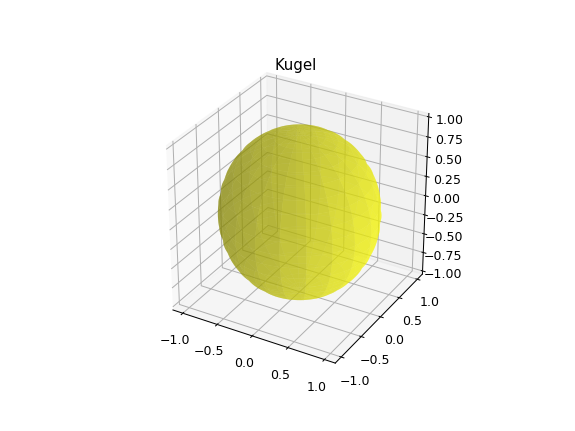

In [41]:
#Kugel

p = np.linspace(0,pi,100)
q = np.linspace(0,2*pi,100)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

#Parameterdarstellung der Kugel:
x = sin(P)*sin(Q) # x[i,j] = x(p[i],q[j])
y = sin(P)*cos(Q)
z = cos(P)

#Erstellt die Figur und fügt ihr einen Subplot ein.
fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(x,y,z,rstride=5,cstride=5,alpha=0.5,color='yellow')    
title("Kugel")
show()

<IPython.core.display.Javascript object>


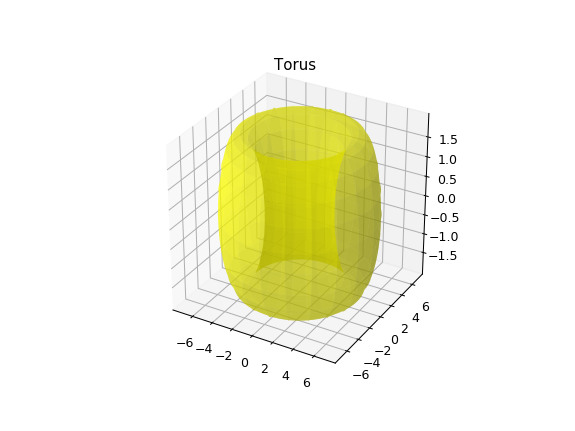

In [40]:
#Erstellen eines Torus

p = np.linspace(0,2*pi,100)
q = np.linspace(0,2*pi,100)

R = 5
r = 2

P,Q = np.meshgrid(p,q)

#Parameterdarstellung des Torus:
x = - sin(P) * (R + r * cos(Q))
y = cos(P) * (R + r * cos(Q))
z = r * sin(Q)

#Erstellt die Figur und fügt ihr einen Subplot ein.
fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(x,y,z,rstride=5,cstride=5,alpha=0.5,color='yellow')   
title("Torus")
show()

<IPython.core.display.Javascript object>


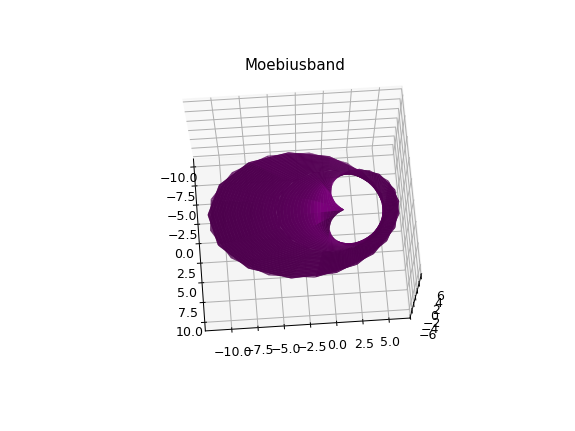

In [49]:
#Erstellen eines Moebiusband

p = np.linspace(0,2*pi,100)
q = np.linspace(0,2*pi,100)

R = 5
a = 1
P,Q = np.meshgrid(p,q)

#Parameterdarstellung eines Moebiusbands
x = (R + P * sin(pi/a * Q)) * cos(2 * pi/a * Q)
y = (R + P * sin(pi/a * Q)) * sin(2 * pi/a * Q)
z = P * cos(pi/a * Q)

#Erstellt die Figur und fügt ihr einen Subplot ein.
fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(y,x,z,rstride=5,cstride=5,alpha=0.8,color='purple')   
title("Moebiusband")
show()

### Aufgabe 2 : Newton Fraktale

- Schreiben Sie eine Funktion `Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e3,Nmax=100)` welche das Newton Verfahren mit der Funktion `f(x)` und deren Ableitung `fprime(x)` beginnend bei $x_0$ solange ausfuehrt bis $\left|f(x_n)\right|\le d_{min}$, $\left|f(x_n)\right|\ge d_{max}$ oder $n=N_{max}$ und den Wert $x_n$ der Nullstellen-Naeherung sowie die Zahl $n$ der notwendigen Iterationsschritte ausgibt.

- Bestimmen Sie fuer alle *komplexen* Anfangswerte $z =x+iy $ auf einem geeigneten Gitter die Approximation der von dort gefundenen Nullstellen der Funktion $f(z)=z^3-1$ und die Zahl der benoetigten Iterationsschritte. Berechnen Sie aus diesen Werten geeignete `[r,g,b]` Farben oder eine skalare Funktion und plotten Sie diese mit `imshow` ueber dem Gitter.

Hinweis : Wenn Sie die Funktionen `Newton_Steps`, `f` und `fprime` sorgfaeltig programmieren, koennen diese direkt auf ein ganzes `numpy` Feld von Anfangswerten gleichzeitig angewendet werden ohne Python Schleifen zu verwenden.

In [39]:
def Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e-3,Nmax=100):
    N=0
    if x0 == 0: #bei einem x0=0 tritt eine Division durch 0 im späteren Verlauf auf, deswegen wird in diesem Fall x0 umgeschrieben
        x0 = 0.001
    x = x0 
    xn=x+1 #Anfangswert für xn
    
    #Algortithmus des Newtonverfahrens:
    while N <= Nmax and ((f(xn) <= f(x) - dmin or f(xn) >= f(x) + dmax)): #geht so lange bis N=Nmax NOCHMAL ÜBERARBEITEN
        N = N+1
        #print(x)
        x = x - f(x) / fprime(x) 
        xn = x - f(x) / fprime(x)
        #print(N)
        
    return xn, N

Newton_Steps(1,lambda x:x**2-2,lambda x:2*x)
    


(1.414213562373095, 5)

#### Zusatzaufgabe :

- Definieren Sie eine Funktion `polymaker(c)` welche bei einem gegebenen iterierbaren Container `c` mit Nullstellen $c_i$ die Funktion `f(x)`$=\prod_i (x-c_i)$ und deren Ableitung `fprime(x)`$=\sum_i \prod_{j\ne i} (x-c_j)$ dynamisch generiert und als Funktionsobjekte zurueckliefert.

- Plotten Sie Beispiele fuer Newton Fraktale von verschiedenen Funktionen, die Sie mit `polymaker(c)` erzeugen.

In [40]:
def polymaker(c):#da bei mir der exec Befehl nicht innerhalb der Funktion ausgeführt werden konnte, wird von der Funktion kein Funktionsobjekt zurückgeliefert
    
    #Erzeugen der Funktion:
    i = len(c) #i ist die Länge des Kontainers
    funktion = "(x-" + str(c[0]) + ")" #für den ersten Iterationsschritt
    for h in range(1,i): #Hier werden die Restlichen Faktoren zur Funktion hinzugefügt
        funktion = funktion + "*(x-" + str(c[h]) + ")"
    type(exec("f=lambda x:" + funktion))    
    #der String der Funktion wird mit dem Vorsatz zum Erzeugen einer lambda-Funktion ausgeführt, also wird die Funktion unter der Variabel f grespreichert:
    ausgabe1 = "f = lambda x:" + funktion #damit der Befehl im nachhinein ausführbar ist, wird hier dei Zuordnung vorne angefügt 
    
    #print(type(aus))
    #print(aus)
    #exec(aus)
    
    #Erzeugen der Ableitungsfunktion
    i=len(c)
    dfunktion="1" #erzeugt Stringvariabel, die mit der Ableitungsfunktion gefüllt wird
    for k in range(0,i):
        if(k>0):
            dfunktion=dfunktion+"+"
        dfunktion=dfunktion
        for u in range(0,i):
            if k == u: #wenn k u ist, dann wird nichts hinzugeschrieben(siehe Ableitungsdefinition)
                None
            elif u != 0: #damit * und + zeichen nicht aufeinanderfolgen, wird hier kein "*" hinzugefüht
                dfunktion = dfunktion + "*(x-" + str(c[u]) + ")" 
            else:
                dfunktion = dfunktion + "(x-" + str(c[u]) + ")" 
    ausgabe2 = "df = lambda x:" + dfunktion #damit der Befehl im nachhinein ausführbar ist, wird hier dei Zuordnung vorne angefügt 
    
    
    # damit beide Befehlsstrings ausführbar sind, benötigen wir einen ;-Trenner zwischen beiden Befehlen
    ausgabe = ausgabe1 + " ; " + ausgabe2 
    print("Übergebener Befehl: " + ausgabe)
    
    return (ausgabe)#liefert den Befehl zum erzeugen der beiden Funktionen als Text zurück, die Ausgabe muss nun nur noch ausgeführt werden


exec(polymaker([1,2,3,4,5]))#die Funktion f ist nun als f(x) definiert, die 1. Ableitung der Funktion f ist als df(x) definiert
print(f(8))
print(df(8))


Übergebener Befehl: f = lambda x:(x-1)*(x-2)*(x-3)*(x-4)*(x-5) ; df = lambda x:1*(x-2)*(x-3)*(x-4)*(x-5)+(x-1)*(x-3)*(x-4)*(x-5)+(x-1)*(x-2)*(x-4)*(x-5)+(x-1)*(x-2)*(x-3)*(x-5)+(x-1)*(x-2)*(x-3)*(x-4)
2520
2754


In [ ]:
from pylab import*

plot()

In [20]:
f=lambda x:(x-1)
f(3)

2

**frohe Weihnachtsferien!**

<IPython.core.display.Javascript object>


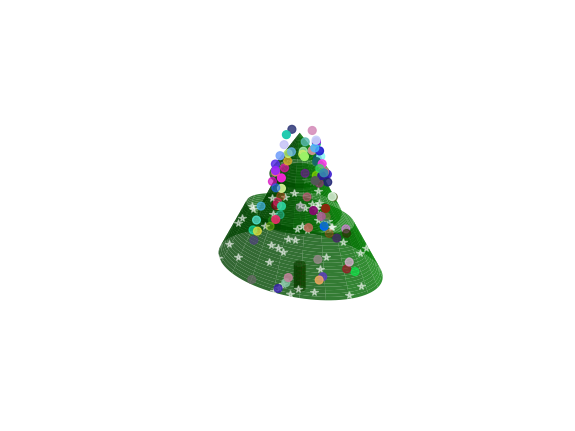

In [6]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

nb = 80           # number of ornamental balls
sb = 40           # size of onramental balls

ns = 100          # number of snow flakes
ms = 'w*'         # marker color and shape of snow flakes
alpha_snow=0.5    # alpha value of snow flakes

alpha_tree=0.8    # alpha value for tree surface



Lh = 100
Lphi = 100
h = np.linspace(0,1,Lh)
phi = np.linspace(0,2*pi,Lphi)
H,PHI = np.meshgrid(h,phi)                #meshgrid of cylinder coordinates

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)

#tree trunk
ax3d.plot_surface(cos(PHI)*0.2,sin(PHI)*0.2,H,rstride=5,cstride=5,color=[0.3,0.1,0],linewidth=0,alpha=alpha_tree) 

#branch cones
ax3d.plot_surface((3-H)*cos(PHI),(2-H)*sin(PHI),1+2*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree) 
ax3d.plot_surface(0.7*(2-H)*cos(PHI),0.7*(2-H)*sin(PHI),3+1.5*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree)
ax3d.plot_surface((1-H)*cos(PHI),(1-H)*sin(PHI),4.5+1.5*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree)

#ornamental ball positions (cylinder coordinates) and colors
hn = np.random.random(nb)
pn = np.random.random(nb)*2*pi
cn = np.random.random((nb,3))
ax3d.scatter3D(1.5*(1.3-hn)*cos(pn),1.5*(1.3-hn)*sin(pn),1+5*hn,s=40,c=cn)


#snow positions and velocities
snox = np.random.random(ns)*6-3
snoy = np.random.random(ns)*6-3
snoz = np.random.random(ns)*6
snov = -np.random.random(ns)*0.01
mysnow, = ax3d.plot3D(snox,snoy,snoz,ms,alpha=alpha_snow)

ax3d.set_xlim(-3,3)
ax3d.set_ylim(-3,3)
ax3d.set_zlim(0,6)
axis('off')

def animate(i):
    global snox,snoy,snoz
    snoz=mod(snoz+snov,6)
    snox=mod(snox+3+np.random.randn(ns)*0.01,6)-3
    snoy=mod(snoy+3+np.random.randn(ns)*0.01,6)-3
    mysnow.set_data(snox,snoy)
    mysnow.set_3d_properties(snoz) # 3D Plots have no set_zdata(...) function
    return None
    
def init():
    return None

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=1, blit=True)

show()